In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [3]:
# First look at the dataframe
listing = pd.read_csv('Data_orleans/new_orleans_airbnb_listings.csv')
listing.head(1)

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,19091,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,"NorthWest Carrollton, where this apartment is ...",72880,2010-01-23,"New Orleans, Louisiana, United States",within an hour,100%,100%,...,4.89,4.95,4.88,4.97,4.97,4.67,4.91,"17STR-08877, 20-OSTR-0105",t,5.07


In [4]:
# First look at the dataframe
reviews = pd.read_csv('Data_orleans/new_orleans_airbnb_reviews.csv')
reviews

,listing_id,id,date,reviewer_id,comments
0,19091,35930,2010-04-16,97343,John was extremely accommodating to our schedu...
1,19091,45900,2010-05-24,99114,John was a great host and made sure that I cou...
2,19091,61668,2010-07-06,128406,My husband and I stayed with John last month a...
3,19091,96538,2010-09-13,228880,John is a great host for your time in New Orle...
4,19091,108793,2010-09-30,214223,john is a fantastic host. the place is perfe...
...,...,...,...,...,...
345948,52969664,485446353923188086,2021-10-31,252217176,we loved staying here
345949,52981598,486186994489825086,2021-11-01,20131320,"Great spot! Clean, modern, bright, comfy bed...."
345950,52986445,486232182077037668,2021-11-01,429338982,Helped me out last minute with the booking. Gr...
345951,53074263,489161400718590155,2021-11-05,1216320,"WOW I LOVED THIS HOUSE! King bed, amazing mura..."


In [5]:
listing.isnull().sum()

id                                0
name                              0
description                      28
neighborhood_overview          1414
host_id                           0
host_since                       38
host_location                    45
host_response_time             1579
host_response_rate             1579
host_acceptance_rate           1466
host_is_superhost                38
host_listings_count              38
host_verifications                0
host_has_profile_pic             38
host_neighbourhood              670
host_identity_verified           38
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   16
bedrooms                        303
beds                            122
amenities                         0
price                             0
minimum_nights              

<div>
<img src="Images/ids.png" width="600"/>
<img src="Images/ids_2.png" width="600"/>
</div>

In [6]:
#conda install openpyxl

In [7]:
# view the different column names and discriptions
pd.set_option('max_colwidth', None)
ids = pd.read_excel("Data_orleans/ids.xlsx")
ids


,Column Name,Description
0,id,Airbnb's unique identifier for the listing
1,name,Name of the listing
2,description,Detailed description of the listing
3,neighborhood_overview,Host's description of the neighbourhood
4,host_id,Airbnb's unique identifier for the host/user
5,host_since,The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.
6,host_location,The host's self reported location
7,host_response_time,That average time it takes a host to respond to a message on the Airbnb platform.
8,host_response_rate,That rate at which a host responds to a message on the Airbnb platform.
9,host_acceptance_rate,That rate at which a host accepts booking requests.


In [8]:
listing['review_scores_cleanliness'].value_counts().head(5)

5.00    1133
4.94     153
4.97     150
4.92     147
4.93     142
Name: review_scores_cleanliness, dtype: int64

In [9]:
# example of neighborhood overview
listing['neighborhood_overview'].loc[2]

'Ours is a neighborhood made up of artists, musicians and plain old working class people.  It is a dog centric, friendly place to be.'

`neighborhood_overview` is an optional discripition for host to add to their listing. It is not required and each is uniquily writen by a host. For this reason I am going to remove it.

In [10]:
# example of neighborhood overview
listing['host_response_time'].value_counts()

within an hour        3658
within a few hours     398
within a day           281
a few days or more     112
Name: host_response_time, dtype: int64

In [11]:
# example of neighborhood overview
listing['host_neighbourhood'].value_counts().head(10)

Central Business District    468
Marigny/Bywater              382
Central City                 371
Seventh Ward                 350
Lower Garden District        320
Treme                        259
Edgewater                    239
French Quarter               222
Mid City                     188
Uptown                       167
Name: host_neighbourhood, dtype: int64

In [12]:
irrelevant = ['neighborhood_overview', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
              'host_acceptance_rate', 'host_verifications', 'host_has_profile_pic', 'host_neighbourhood', 'number_of_reviews_ltm',
              'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'host_identity_verified', 'reviews_per_month', 
              'host_listings_count', 'has_availability', 'amenities']
focus = listing.drop(irrelevant, axis=1)

In [13]:
focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6028 non-null   int64  
 1   name                         6028 non-null   object 
 2   description                  6000 non-null   object 
 3   host_id                      6028 non-null   int64  
 4   host_is_superhost            5990 non-null   object 
 5   neighbourhood_cleansed       6028 non-null   object 
 6   latitude                     6028 non-null   float64
 7   longitude                    6028 non-null   float64
 8   property_type                6028 non-null   object 
 9   room_type                    6028 non-null   object 
 10  accommodates                 6028 non-null   int64  
 11  bathrooms_text               6012 non-null   object 
 12  bedrooms                     5725 non-null   float64
 13  beds              

In [14]:
focus['neighbourhood_cleansed'].value_counts()

Central Business District    840
Central City                 506
Marigny                      387
Treme - Lafitte              387
Seventh Ward                 374
                            ... 
Dixon                          3
New Aurora - English Turn      3
U.S. Naval Base                3
Read Blvd West                 2
B. W. Cooper                   1
Name: neighbourhood_cleansed, Length: 67, dtype: int64

In [15]:
listing['host_neighbourhood'].value_counts()

Central Business District    468
Marigny/Bywater              382
Central City                 371
Seventh Ward                 350
Lower Garden District        320
                            ... 
Inwood                         1
East New York                  1
Long Beach                     1
Lincoln Park                   1
Westshore                      1
Name: host_neighbourhood, Length: 132, dtype: int64

In [16]:
# check for duplicates
focus.duplicated().sum()

0

In [17]:
# search for duplicates
dupes = focus[focus['id'].duplicated()]
len(dupes)

0

#### remove NaN is review columns

In [18]:
# Seem if the mean would be a good option for replacing null values
focus['review_scores_rating'].median()

4.86

In [19]:
focus['review_scores_rating'].fillna((focus['review_scores_rating'].median()), inplace=True)
focus['review_scores_accuracy'].fillna((focus['review_scores_accuracy'].median()), inplace=True)
focus['review_scores_cleanliness'].fillna((focus['review_scores_cleanliness'].median()), inplace=True)
focus['review_scores_checkin'].fillna((focus['review_scores_checkin'].median()), inplace=True)
focus['review_scores_communication'].fillna((focus['review_scores_communication'].median()), inplace=True)
focus['review_scores_location'].fillna((focus['review_scores_location'].median()), inplace=True)
focus['review_scores_value'].fillna((focus['review_scores_value'].median()), inplace=True)

#### remove NaN is `host_is_superhost`

In [20]:
focus['host_is_superhost'].value_counts()

f    3306
t    2684
Name: host_is_superhost, dtype: int64

In [21]:
focus['host_is_superhost'].fillna('unknown', inplace=True)

In [22]:
focus.loc[(focus['host_is_superhost'] == 'unknown') & (focus['review_scores_rating'] >= 4.8), 'host_is_superhost'] = 't'

In [23]:
focus.loc[(focus['host_is_superhost'] == 'unknown') & (focus['review_scores_rating'] < 4.8), 'host_is_superhost'] = 'f'

In [24]:
focus['host_is_superhost'].value_counts()

f    3312
t    2716
Name: host_is_superhost, dtype: int64

#### remove NaN is `bedrooms`

In [25]:
# See what going on with the missing bedroomd data
# remove outliers later
focus['bedrooms'].value_counts(normalize=True)

1.0     0.398603
2.0     0.306550
3.0     0.175197
4.0     0.060786
5.0     0.040873
6.0     0.008384
8.0     0.003319
7.0     0.002271
9.0     0.001572
10.0    0.000699
11.0    0.000349
12.0    0.000349
21.0    0.000175
18.0    0.000175
16.0    0.000175
15.0    0.000175
19.0    0.000175
23.0    0.000175
Name: bedrooms, dtype: float64

In [26]:
# Created a df so I can take a closer look into what would would be best to fill NaN values with
na_bedroom = null_rating = focus[focus['bedrooms'].isnull()]
na_bedroom.head(5)

,id,name,description,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
31,425878,Bayou St. John Cottage!!,"<b>The space</b><br />Hello! I have an independent mother-in law like cottage available and ready for your stay. It is in the Bayou St. John area (near Mid city) and walking distance to Jazz Fest and Voodoo Fest, as well as the Bayou St. John, City Park, coffee shops, bars, and restaurants! You will be located an average of a ten minute or less drive to most anyplace else in the city (the quarter, CBD, Uptown, UNO, Metairie, etc.). <br /><br />The unit is fully furnished, TV, internet, utilities, linens, basic cooking equipment, etc. included. There are 3 queen size beds (one Queen mattress set, One Queen convertible sofa, One Queen Futon) as well as 1 twin size bed. It is important to note that when all beds are opened, the available floor space gets a bit tight...so not suitable for guests looking for privacy. <br /><br />The space is vaulted and gets great light! When the weather is right, throw open all the french doors and enjoy! Located at the back of the property and c",1919429,f,Bayou St. John,29.97465,-90.08823,Entire guesthouse,Entire home/apt,...,246,36,4.69,4.66,4.66,4.94,4.91,4.89,4.77,f
37,461675,Studio condo1 in New Orleans,"A direct booking is NOT RECOMMENDED. Please send a chat message on this platform to inquire on availability as I have multiple listings and my calendar might not be accurate. Also, I need to make sure this is a good fit by asking a few questions.<br /><br />studio unit for party of 2.<br /><br /><b>The space</b><br />Unit Amenities<br />· Hairdryer<br /><br />Resort Amenities<br />· Fitness Center<br />· Laundry Facilities<br />· Sun Deck (Rooftop)<br />· Swimming Pool (Outdoor)<br />· Some amenities/activities are available at an additional charge.<br /><br /><b>License number</b><br />Exempt: This listing is a licensed hotel, motel, or bed and breakfast",103427,f,Central City,29.93579,-90.07948,Entire rental unit,Entire home/apt,...,359,5,4.60,3.80,5.00,4.80,4.80,4.80,4.40,f
53,708852,studio unit 3 New Orleans,"studio unit for up to a party of 4. Can request a unit with one or 2 beds.<br /><br /><b>The space</b><br />studio unit in New Orleans for up to a party of 4. Can request one or two beds in the unit.<br /><br /><b>License number</b><br />Exempt: This listing is a licensed hotel, motel, or bed and breakfast",103427,f,Lower Garden District,29.93396,-90.08066,Entire rental unit,Entire home/apt,...,90,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
63,810413,City Cove: Great Monthly Rates!,"Professionally decorated studio apartment centrally located within 2 blocks to the St.Charles Avenue street car! Independent apartment with private entrance -- not a room within a residence. Great location for exploring the best of New Orleans!<br /><br /><b>The space</b><br />Well-appointed, professionally outfitted corporate rental unit contains everything you need for easy living in New Orleans. Quality furnishings including a full size Murphy bed and full size sofa sleeper, high definition TV, high speed wireless Internet, fully equipped kitchen with microwave, dishwasher, full size stove/oven all stainless steel, granite countertops, simply adorable! <br /><br />All utilities, furnishings, housewares and cable and Wi-Fi Internet included.<br /><br /><b>License number</b><br />City registration pending",2852373,t,Central City,29.93362,-90.08313,Entire rental unit,Entire home/apt,...,189,47,4.66,4.83,4.36,4.96,4.89,4.91,4.64,f
150,1452644,Charming casita by Mississipi River,"Have a relaxing retreat in a private 500 square ft casatina by the Mississippi River. Our casatina is a part of a private home and perfect for a quiet retreat, romantic geta

In [27]:
# check out the property type for rows with no bedroom count
na_bedroom['property_type'].value_counts()

Entire rental unit                  105
Entire guest suite                   29
Entire condominium (condo)           26
Entire guesthouse                    25
Room in boutique hotel               24
Entire residential home              15
Room in hotel                        13
Room in bed and breakfast            10
Entire serviced apartment             9
Private room in rental unit           9
Entire loft                           7
Private room in residential home      6
Private room in guest suite           4
Entire cottage                        3
Room in aparthotel                    3
Tiny house                            2
Private room in guesthouse            2
Entire place                          2
Entire townhouse                      2
Private room in resort                2
Private room in loft                  1
Private room in cottage               1
Camper/RV                             1
Private room in earth house           1
Private room in hostel                1


In [28]:
# check out the room type for rows with no bedroom count
na_bedroom['room_type'].value_counts()

Entire home/apt    228
Private room        50
Hotel room          25
Name: room_type, dtype: int64

In [29]:
# check out the number of beds for rows with no bedroom count
# this is the most telling in what to do with the NaN rows because we can assume that 1 bed is one bedroom
na_bedroom['beds'].value_counts()

1.0    177
2.0     79
3.0     10
4.0      6
6.0      1
Name: beds, dtype: int64

The number of beds for the NaN number of bedrooms is the most telling in what to do with the NaN rows because we can assume that 1 bed is one bedroom. I am also choosing to put 2 beds as 2 bedroom. However, 3 beds and higher I am choosing to put them all as 3 bedrooms. Many places will say a couch, loft, murphy bed, each layer of a bunk-bed, and blowup mattress are all considered beds, but we know from the overall count a place with more than 3 bedrooms is unlikely.  

In [30]:
# fill NaN with 'unknown' so computer can easily find them
focus['bedrooms'].fillna('unknown', inplace=True)

In [31]:
# make stays with one and two beds be one bedroom
# make stays with 3 and above beds a two bedroom
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] == 1.0), 'bedrooms'] = 1.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] == 2.0), 'bedrooms'] = 2.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] >= 3.0), 'bedrooms'] = 2.0

In [32]:
# There are still 30 listings where bedrooms is missing
focus['bedrooms'].value_counts()

1.0        2459
2.0        1851
3.0        1003
4.0         348
5.0         234
6.0          48
unknown      30
8.0          19
7.0          13
9.0           9
10.0          4
11.0          2
12.0          2
21.0          1
18.0          1
16.0          1
15.0          1
19.0          1
23.0          1
Name: bedrooms, dtype: int64

In [33]:
focus.loc[focus['bedrooms'] == 'unknown'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 53 to 5817
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           30 non-null     int64  
 1   name                         30 non-null     object 
 2   description                  21 non-null     object 
 3   host_id                      30 non-null     int64  
 4   host_is_superhost            30 non-null     object 
 5   neighbourhood_cleansed       30 non-null     object 
 6   latitude                     30 non-null     float64
 7   longitude                    30 non-null     float64
 8   property_type                30 non-null     object 
 9   room_type                    30 non-null     object 
 10  accommodates                 30 non-null     int64  
 11  bathrooms_text               21 non-null     object 
 12  bedrooms                     30 non-null     object 
 13  beds               

In [34]:
# Make a new df so we can have a easy look into those specific rows
na_bedroom = focus.loc[focus['bedrooms'] == 'unknown']

In [35]:
# accommodates is good column help us make a good guess on number bedrooms
na_bedroom['accommodates'].value_counts()

2    18
0     7
4     3
1     1
8     1
Name: accommodates, dtype: int64

In [36]:
# Take a look into the specific listings that accommodate 0 people 
na_bedroom.loc[na_bedroom['accommodates'] == 0]

,id,name,description,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4310,42875637,Federal City Inn & Suites,NaN,266877580,f,U.S. Naval Base,29.947580,-90.032720,Room in hotel,Hotel room,...,0,3,2.33,2.67,1.00,3.67,3.67,2.33,1.67,f
4350,43309157,Hotel Royal,NaN,311387788,f,French Quarter,29.960460,-90.062330,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4351,43309170,Melrose Suites,NaN,311900534,f,Marigny,29.965070,-90.062000,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4352,43309178,Historic Streetcar Inn,NaN,311388965,f,Central City,29.939010,-90.075980,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4353,43309185,Chateau Hotel,NaN,311388674,f,French Quarter,29.959970,-90.061740,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4354,43309194,Audubon Cottages,NaN,311388025,f,French Quarter,29.957980,-90.067800,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
5336,49751833,The Old No. 77 Hotel,NaN,267642269,f,Central Business District,29.947905,-90.067505,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f


In [37]:
# Choosing to drop the 7 rows that say they accommodates 0 people, seems like these listings have too many errors
# The rest be placed based on how many people the listing can accommodate

focus.loc[(focus['bedrooms'] == 'unknown') & (focus['accommodates'] >= 1), 'bedrooms'] = 1.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['accommodates'] >= 4), 'bedrooms'] = 2.0

In [38]:
# See if there are other row that have accommedate == 0 people 
focus['accommodates'].value_counts()

4     1619
2     1592
6     1167
8      510
10     340
3      228
5      187
16      89
1       77
7       67
12      65
9       26
14      25
15      12
13       9
11       8
0        7
Name: accommodates, dtype: int64

In [39]:
# Drop the 7 rows that have listings which accommedate 0 people
focus.drop(focus.index[focus['accommodates'] == 0], inplace=True)
focus['accommodates'].value_counts()

4     1619
2     1592
6     1167
8      510
10     340
3      228
5      187
16      89
1       77
7       67
12      65
9       26
14      25
15      12
13       9
11       8
Name: accommodates, dtype: int64

#### look into NaN values in `beds`

In [40]:
# See what going on with the missing bedroomd data
# remove outliers later
focus['beds'].value_counts(normalize=True)

2.0     0.292584
1.0     0.274467
3.0     0.182188
4.0     0.107179
5.0     0.052150
6.0     0.033695
7.0     0.018456
8.0     0.014561
10.0    0.008466
9.0     0.007450
11.0    0.002032
12.0    0.001693
13.0    0.001185
14.0    0.001185
16.0    0.000677
27.0    0.000508
15.0    0.000339
17.0    0.000339
21.0    0.000169
24.0    0.000169
20.0    0.000169
25.0    0.000169
30.0    0.000169
Name: beds, dtype: float64

In [41]:
# fill NaN with 'unknown' so computer can easily find them
focus['beds'].fillna('unknown', inplace=True)

In [42]:
na_beds = focus.loc[focus['beds'] == 'unknown']

In [43]:
# bedrooms is good column help us make a good guess on number bedrooms
na_beds['bedrooms'].value_counts()

1.0    85
2.0    13
3.0    11
4.0     3
6.0     2
5.0     1
Name: bedrooms, dtype: int64

In [44]:
# Choosing fill unknown beds based on number of bedrooms 
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] == 1.0), 'beds'] = 1.0
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] >= 2.0), 'beds'] = 2.0
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] >= 3.0), 'beds'] = 3.0 

# Make sure all the unknown beds are gone
focus['beds'].value_counts(normalize=True)

2.0     0.291978
1.0     0.283342
3.0     0.178708
4.0     0.105132
5.0     0.051154
6.0     0.033051
7.0     0.018103
8.0     0.014283
10.0    0.008304
9.0     0.007308
11.0    0.001993
12.0    0.001661
13.0    0.001163
14.0    0.001163
16.0    0.000664
27.0    0.000498
15.0    0.000332
17.0    0.000332
21.0    0.000166
24.0    0.000166
20.0    0.000166
25.0    0.000166
30.0    0.000166
Name: beds, dtype: float64

#### look into NaN values in `description`

In [45]:
focus.isna().sum()

id                              0
name                            0
description                    21
host_id                         0
host_is_superhost               0
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  9
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
maximum_nights                  0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookab

In [46]:
# fill NaN with 'unknown' so computer can easily find them
focus['description'].fillna('none', inplace=True)

In [47]:
# Make a df so I can easily look at listings with no description
na_description = focus.loc[focus['description'] == 'none']

In [48]:
# Nothing sees off with these am going to leave the description as none
na_description.head(5)

,id,name,description,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
1622,19577926,Saratoga suites,none,135150122,f,Central City,29.94308,-90.08050,Entire rental unit,Entire home/apt,...,365,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
2422,26220326,Comfy sofa bed & home cooked meals!,none,58891362,f,Broadmoor,29.94510,-90.09901,Private room in residential home,Private room,...,0,6,5.00,3.67,4.83,4.67,4.83,5.00,4.17,f
2513,27232640,Beautiful & Spacious 3 Bedroom Mid City!,none,26598201,t,Mid-City,29.96758,-90.10172,Entire residential home,Entire home/apt,...,306,37,4.78,4.89,4.89,4.97,4.95,4.89,4.81,t
2841,30893470,Glouster Efficiency,none,179393430,f,West Lake Forest,30.02702,-89.98521,Private room in guest suite,Private room,...,363,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
2850,31026414,Mid City Studio Apartment,none,26598201,t,Mid-City,29.96787,-90.09300,Entire rental unit,Entire home/apt,...,210,31,4.65,4.84,4.71,5.00,4.97,4.81,4.71,f


#### look into NaN values in `bathrooms_text`

In [49]:
# there might be some outliers here that need to be delt with
focus['bathrooms_text'].value_counts()

1 bath              2775
2 baths             1423
1 private bath       431
2.5 baths            280
1.5 baths            259
1 shared bath        251
3 baths              231
4 baths              104
3.5 baths             94
2 shared baths        36
4.5 baths             31
1.5 shared baths      25
5.5 baths             14
5 baths               13
6 baths                9
8 baths                6
7 baths                5
2.5 shared baths       4
9.5 baths              4
3 shared baths         3
0 shared baths         2
11 baths               2
7 shared baths         1
7.5 baths              1
12 baths               1
10.5 baths             1
6.5 baths              1
0 baths                1
18 baths               1
21 baths               1
6.5 shared baths       1
9 baths                1
Name: bathrooms_text, dtype: int64

In [50]:
# fill NaN with 'unknown' so computer can easily find them
focus['bathrooms_text'].fillna('unknown', inplace=True)

In [51]:
# Make a df so I can easily look at listings with no description
na_bath = focus.loc[focus['bathrooms_text'] == 'unknown']

In [52]:
# bedrooms is good column help us make a good guess on number of bathrooms
na_bath['bedrooms'].value_counts()

1.0     4
2.0     4
11.0    1
Name: bedrooms, dtype: int64

In [53]:
# Choosing fill unknown bathrooms based on number of bedrooms 
focus.loc[(focus['bathrooms_text'] == 'unknown') & (focus['bedrooms'] == 1.0), 'bathrooms_text'] = '1 bath'
focus.loc[(focus['bathrooms_text'] == 'unknown') & (focus['bedrooms'] >= 2.0), 'bathrooms_text'] = '2 baths'

# Make sure all the unknown beds are gone
focus['bathrooms_text'].value_counts(normalize=True)

1 bath              0.461551
2 baths             0.237170
1 private bath      0.071583
2.5 baths           0.046504
1.5 baths           0.043016
1 shared bath       0.041687
3 baths             0.038366
4 baths             0.017273
3.5 baths           0.015612
2 shared baths      0.005979
4.5 baths           0.005149
1.5 shared baths    0.004152
5.5 baths           0.002325
5 baths             0.002159
6 baths             0.001495
8 baths             0.000997
7 baths             0.000830
2.5 shared baths    0.000664
9.5 baths           0.000664
3 shared baths      0.000498
0 shared baths      0.000332
11 baths            0.000332
7 shared baths      0.000166
7.5 baths           0.000166
12 baths            0.000166
10.5 baths          0.000166
6.5 baths           0.000166
0 baths             0.000166
18 baths            0.000166
21 baths            0.000166
6.5 shared baths    0.000166
9 baths             0.000166
Name: bathrooms_text, dtype: float64

### All NaN data has been accounted for

### Make df for different models

In [54]:
# Make df for columns that belong in a NLP model
nlp = focus[['id', 'name', 'description']].copy()
nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6021 entries, 0 to 6027
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6021 non-null   int64 
 1   name         6021 non-null   object
 2   description  6021 non-null   object
dtypes: int64(1), object(2)
memory usage: 188.2+ KB


In [55]:
# Make df for the columns needed to map the listings
vis_location = focus[['id', 'latitude', 'longitude', 'neighbourhood_cleansed']].copy()

In [56]:
# Make df for columns that belong in a regression model
drop_focus = ['latitude', 'longitude', 'name', 'description', 'id', 'host_id']
regression = focus.drop(drop_focus, axis = 1)

In [57]:
# Double check there are no NaN values
regression.isnull().sum()

host_is_superhost              0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

## Lets start with the Regression Model

First I will scrub the data to look at data types, identify outliers, check for multicollinearity, and normalize data. Then I will split the data. Followed by taking steps to prepare the data for modeling.

# Data Visualization

First I will do some light scrubing to make sure all data types are prepared for plotting & visualization. 

In [58]:
regression["price"] = regression["price"].str.replace("$", "")
regression["price"] = regression["price"].str.replace(",", "")
regression["price"] = regression["price"].astype("float")

/var/folders/69/mxnlrkmx4jnc_8hwdfxyc3y40000gn/T/ipykernel_43033/1212609674.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  regression["price"] = regression["price"].str.replace("$", "")


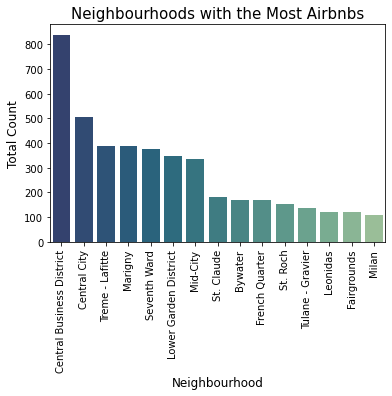

In [59]:
# view neighborhood data by count
sns.countplot(data=regression, x='neighbourhood_cleansed', palette='crest_r',
              order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.title('Neighbourhoods with the Most Airbnbs', fontsize=15)
plt.show()

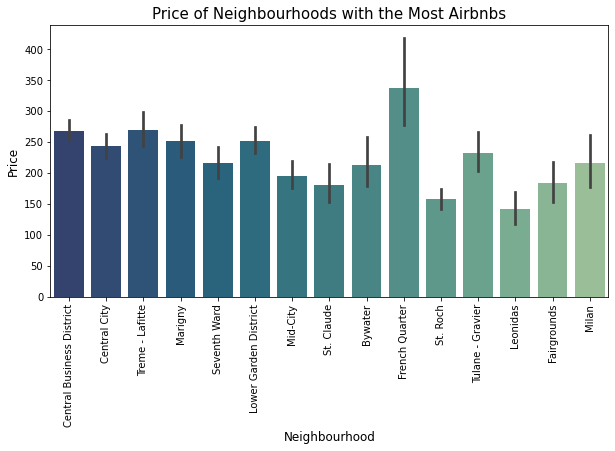

In [60]:
#sns.countplot(data=regression, x='neighbourhood_cleansed', palette='crest',
              #order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index)
plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_cleansed", y="price", data=regression,palette='crest_r',
            order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price of Neighbourhoods with the Most Airbnbs', fontsize=15)
plt.show()

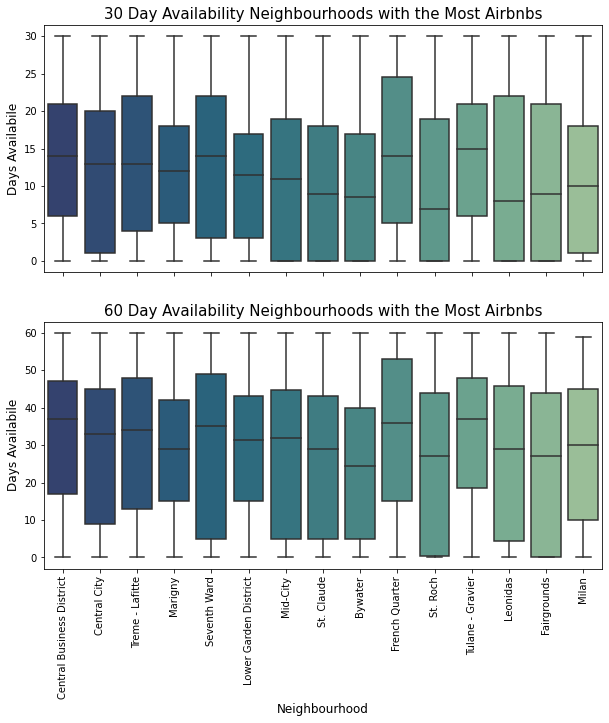

In [61]:
# Plot availability for 30 & 60 days for neighbourhoods with the most airbnbs
fig, axs = plt.subplots(nrows=2,sharex=True, figsize=(10,10))

#Plot availability_30 days
sns.boxplot(x="neighbourhood_cleansed", y="availability_30", data=regression,palette='crest_r',
            order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index, ax=axs[0])
plt.xticks(rotation=90)
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability Neighbourhoods with the Most Airbnbs', fontsize=15)

# Plot availability_60 days
sns.boxplot(x="neighbourhood_cleansed", y="availability_60", data=regression,palette='crest_r',
            order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index, ax=axs[1])
plt.xticks(rotation=90)
ax=axs[1].set_xlabel('Neighbourhood', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('60 Day Availability Neighbourhoods with the Most Airbnbs', fontsize=15)
plt.show()


plt.show()

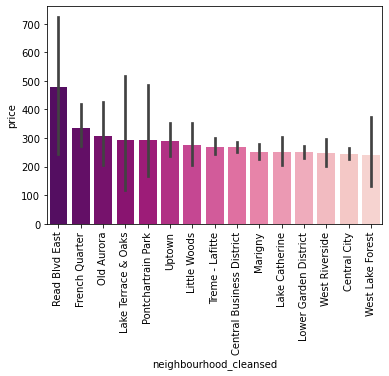

In [62]:
# View neighourhoods with the highest price
plot_order = regression.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).iloc[:15].index.values
color = sns.color_palette("RdPu_r", 18)
sns.barplot(data=regression, x='neighbourhood_cleansed', y='price', palette=color,
              order=plot_order)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Make list of top neighbourhoods by count
top_count = regression.neighbourhood_cleansed.value_counts().iloc[:15].index
top_count

Index(['Central Business District', 'Central City', 'Treme - Lafitte',
       'Marigny', 'Seventh Ward', 'Lower Garden District', 'Mid-City',
       'St. Claude', 'Bywater', 'French Quarter', 'St. Roch',
       'Tulane - Gravier', 'Leonidas', 'Fairgrounds', 'Milan'],
      dtype='object')

In [64]:
# I want to print a list of over lapping neighbourhoods
bool(set(plot_order) & set(top_count))

True

In [65]:
any([item in plot_order for item in top_count])

True

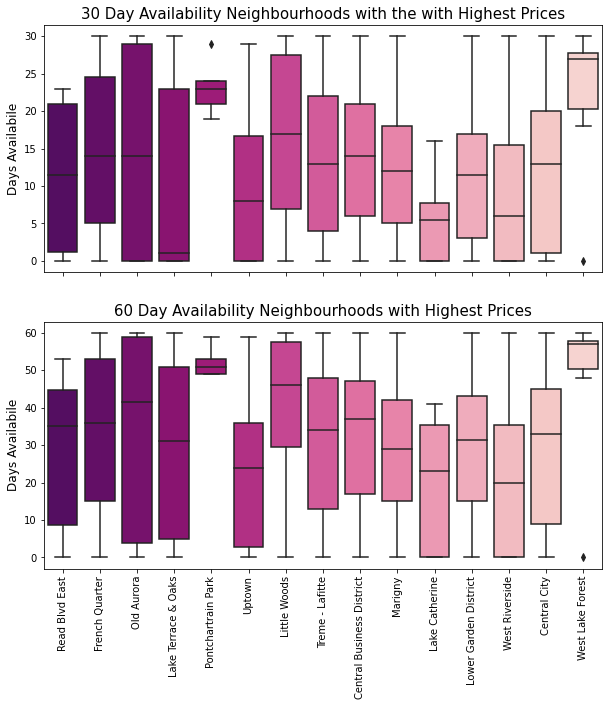

In [66]:
# View neighourhoods with the highest price
plot_order = regression.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).iloc[:15].index.values
color = sns.color_palette("RdPu_r", 18)

# Plot availability for 30 & 60 days for neighbourhoods with the most airbnbs
fig, axs = plt.subplots(nrows=2,sharex=True, figsize=(10,10))

sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_30', palette=color,
              order=plot_order, ax=axs[0])
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability Neighbourhoods with the with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

# Plot availability for 30 & 60 days for neighbourhoods with the most airbnb
sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_60', palette=color,
              order=plot_order, ax=axs[1])
ax=axs[1].set_xlabel('', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('60 Day Availability Neighbourhoods with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

plt.show()

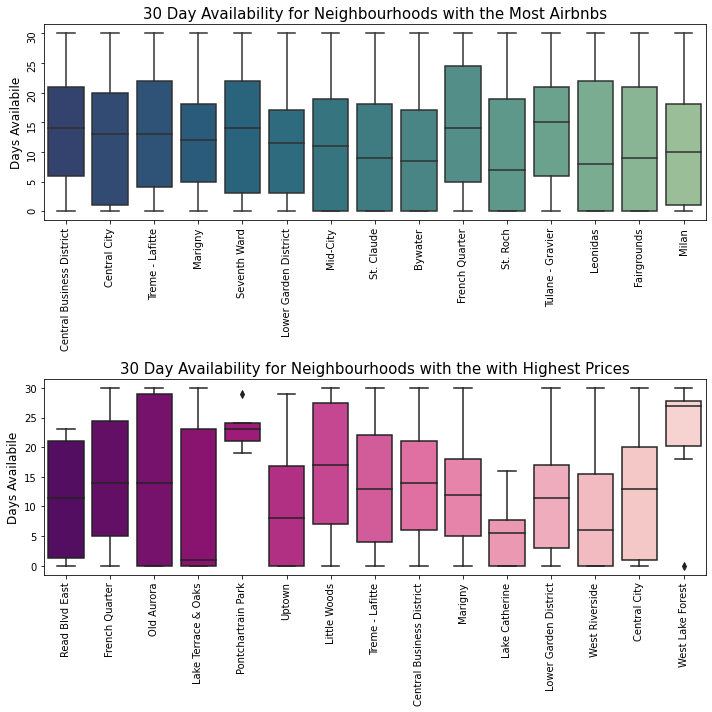

In [67]:
# Plot availability for 30 & 60 days for neighbourhoods with the most airbnbs
fig, axs = plt.subplots(nrows=2,sharex=False, figsize=(10,10))

#Plot availability_30 days
sns.boxplot(x="neighbourhood_cleansed", y="availability_30", data=regression,palette='crest_r',
            order=regression.neighbourhood_cleansed.value_counts().iloc[:15].index, ax=axs[0])
plt.xticks(rotation=90)
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability for Neighbourhoods with the Most Airbnbs', fontsize=15)
ax=axs[0].tick_params(labelrotation=90)

# Plot availability_60 days
sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_30', palette=color,
              order=plot_order, ax=axs[1])
ax=axs[1].set_xlabel('', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('30 Day Availability for Neighbourhoods with the with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

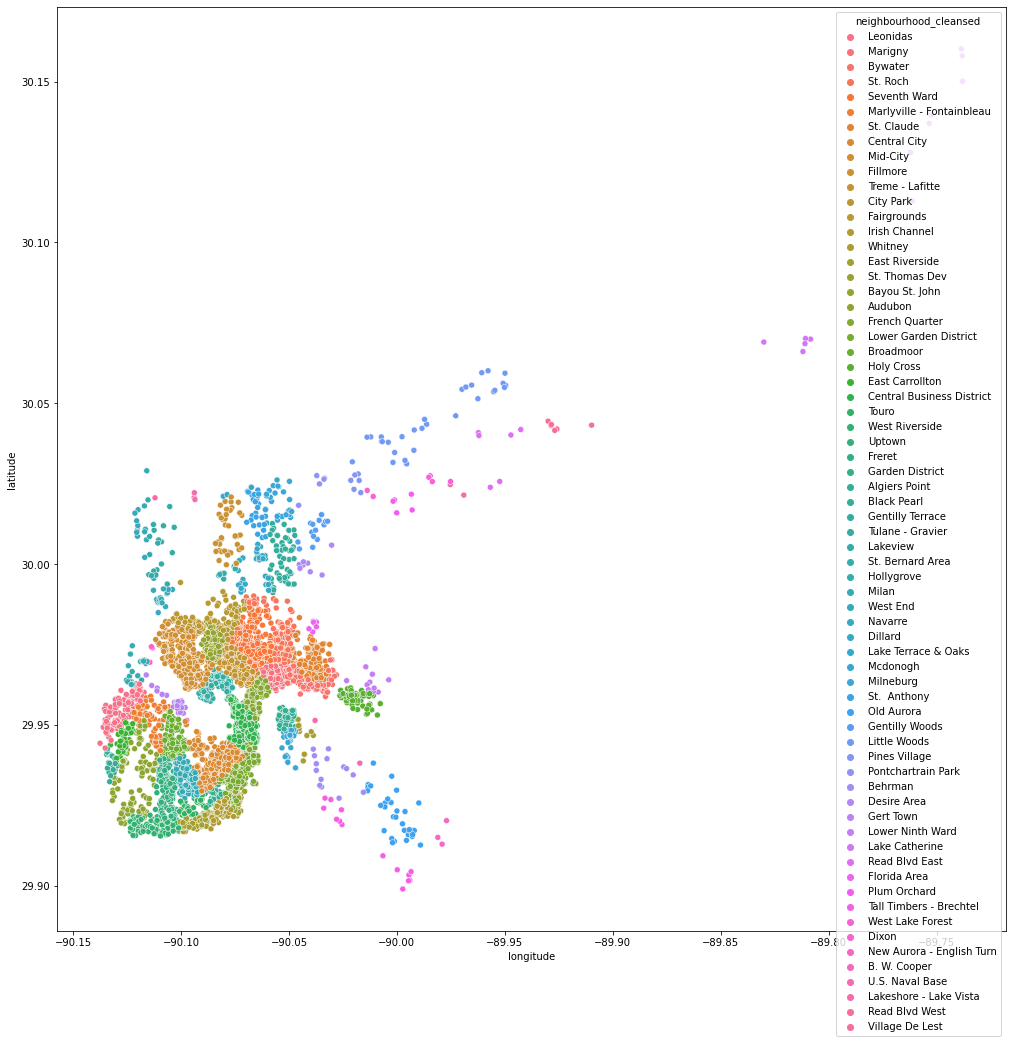

In [68]:
# plot all the airbnbs
plt.figure(figsize=(17,17))
sns.scatterplot(x = vis_location.longitude, y=vis_location.latitude,hue=vis_location.neighbourhood_cleansed)
plt.ioff()

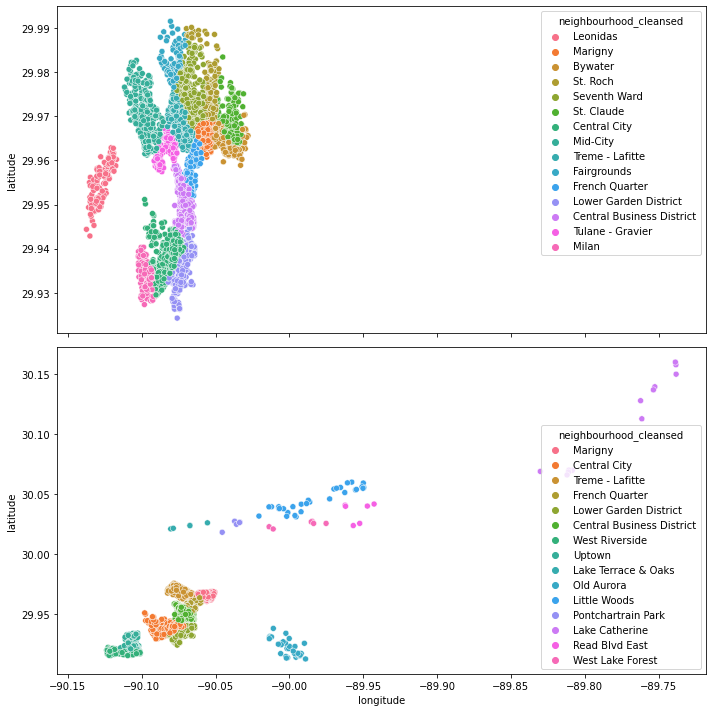

<Figure size 720x720 with 0 Axes>

In [69]:
fig, axs = plt.subplots(nrows=2,sharex=True, figsize=(10,10))

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude',
            hue='neighbourhood_cleansed', ax=axs[0],
            data=vis_location.loc[vis_location.neighbourhood_cleansed.isin(top_count)])

sns.scatterplot(x='longitude', y='latitude',
            hue='neighbourhood_cleansed', ax=axs[1],
            data=vis_location.loc[vis_location.neighbourhood_cleansed.isin(plot_order)])

fig.tight_layout()
plt.show()

In [70]:
#conda install geopandas did not work
#pip install geopandas

In [71]:
import geopandas as gpd
nb = 'neighbourhoods.geojson'
regions = gpd.read_file('Data_orleans/neighbourhoods.geojson')
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        72 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             72 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.8+ KB


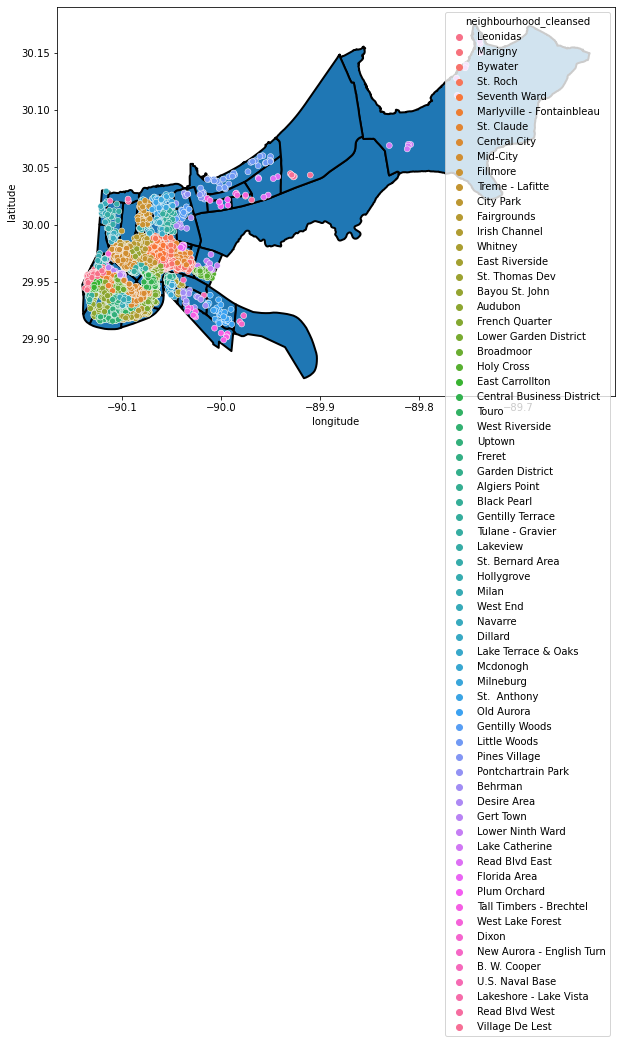

In [72]:
# plot all the airbnbs
ax = regions.plot(figsize=(10,10),
                edgecolor="black",
                linewidth=2)
sns.scatterplot(x = vis_location.longitude, y=vis_location.latitude,hue=vis_location.neighbourhood_cleansed)
plt.ioff()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

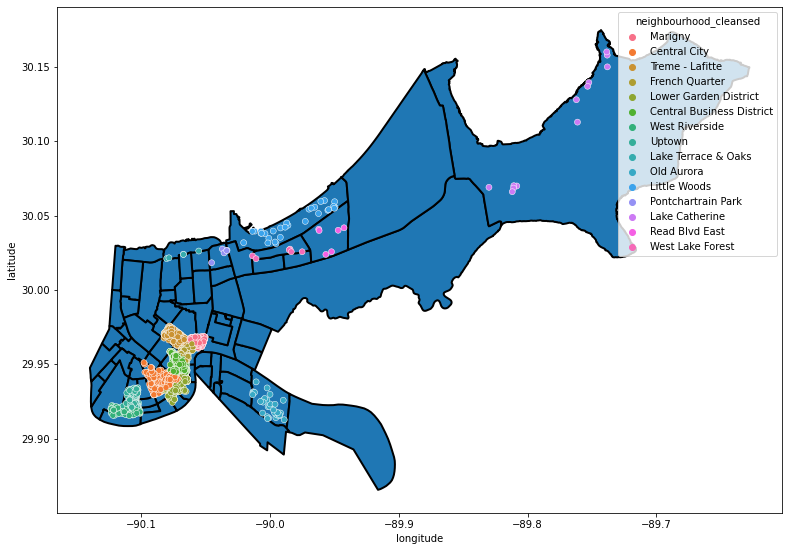

In [73]:
# plot all the airbnbs
ax = regions.plot(figsize=(13,13),
                edgecolor="black",
                linewidth=2)
sns.scatterplot(x='longitude', y='latitude',
            hue='neighbourhood_cleansed',
            data=vis_location.loc[vis_location.neighbourhood_cleansed.isin(plot_order)])

In [74]:
# plot all the airbnbs
#ax = regions.plot(figsize=(13,13),
                #edgecolor="black",
                #linewidth=2, column='neighbourhood')
#regions.loc[regions[need] == 1].plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

In [75]:
#need = ['Central Business District', 'Central City', 'Treme - Lafitte',
       #'Marigny', 'Seventh Ward', 'Lower Garden District', 'Mid-City',
       #'St. Claude', 'Bywater', 'French Quarter', 'St. Roch',
       #'Tulane - Gravier', 'Leonidas', 'Fairgrounds', 'Milan']

In [76]:
regions['neighbourhood'].head(15)

0               Garden District
1                  Little Woods
2                     Iberville
3                    Holy Cross
4      Viavant - Venetian Isles
5               U.S. Naval Base
6                 Algiers Point
7                       Whitney
8                  B. W. Cooper
9                       Audubon
10                     Fillmore
11                   Old Aurora
12              East Carrollton
13               Bayou St. John
14    Central Business District
Name: neighbourhood, dtype: object

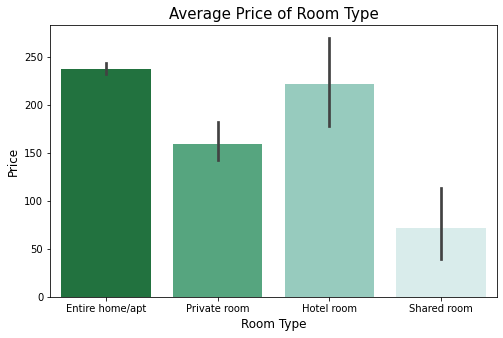

In [77]:
# Take a look at possible relationship between Price and Room Type
plt.figure(figsize=(8,5))
sns.barplot(x="room_type", y="price", data=regression, palette = 'BuGn_r')
#plt.xticks(rotation=90)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average Price of Room Type', fontsize=15)
plt.show()

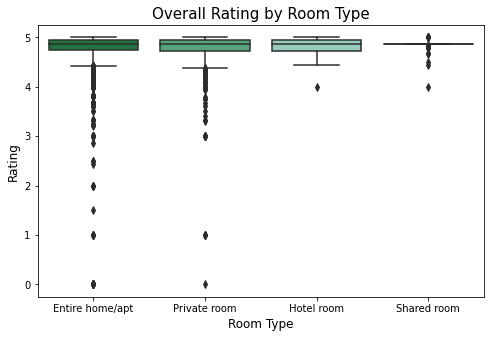

In [78]:
# Take a look at possible relationship between Price and Room Type
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="review_scores_rating", data=regression, palette = 'BuGn_r')
#plt.xticks(rotation=90)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Overall Rating by Room Type', fontsize=15)
plt.show()

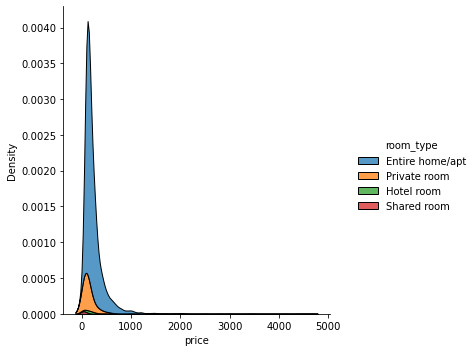

In [79]:
sns.displot(regression, x="price", hue="room_type", fill=True, multiple="stack",  kind="kde")

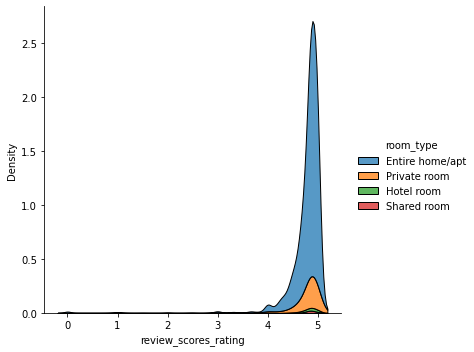

In [80]:
sns.displot(regression, x="review_scores_rating", hue="room_type", fill=True, multiple="stack",  kind="kde")

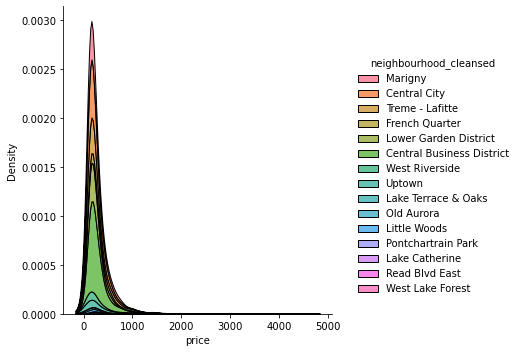

In [81]:
sns.displot(data=regression.loc[regression.neighbourhood_cleansed.isin(plot_order)], x="price", hue="neighbourhood_cleansed", fill=True, multiple="stack",  kind="kde")

### Data Visualization

Our Exploratory Analysis and Visualizations give us our first look at relationships and possible future complications we might see in out modeling. Overall we saw that price has a possible relationship with many of the columns such as `room_type`, `neighbourhood_cleansed`, and `30_Availability`. When we get to the modeling portion of this analysis we will see how strong this relationship are and find any other relationships among the columns that were not visualized. 
We also saw some outliers in some of our visualization.

### Exploratory Analysis
Further exploratory analysis will give us a better look at outliers, multicollinary, normality, and homoscedasticity

In [82]:
# Group the bathrooms to make data easier to understand 
regression.loc[regression['bathrooms_text'].str.contains("1|0"),'bathrooms_text'] = '1 bath'
regression.loc[regression['bathrooms_text'].str.contains("2"),'bathrooms_text'] = '2 baths'
regression.loc[regression['bathrooms_text'].str.contains("3"),'bathrooms_text'] = '3 baths'
regression.loc[regression['bathrooms_text'].str.contains("4"),'bathrooms_text'] = '4 baths'
regression.loc[regression['bathrooms_text'].str.contains("5|6|7|8|9"),'bathrooms_text'] = '5 or more baths'
regression['bathrooms_text'].value_counts()

1 bath             3754
2 baths            1748
3 baths             328
4 baths             135
5 or more baths      56
Name: bathrooms_text, dtype: int64

In [83]:
regression.rename(columns = {'bathrooms_text': 'bathrooms', 'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

### Before we remove outliers and encode the data we will split the data into test and training sets

In [84]:
from sklearn.model_selection import train_test_split
#y = regression['price'].copy()
#X = regression.drop('price',axis=1).copy()

#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
#X_train.shape,X_test.shape

In [85]:
# make df with both training sets so price can be plotted still
#Xy_train = X_train.join(y_train)

In [86]:
#y_train_df = y_train.to_frame()

In [87]:
df_train, df_test = train_test_split(regression,random_state=42)
df_train.shape,df_test.shape

((4515, 24), (1506, 24))

In [88]:
# Make funtions to easily view distribution
def plot_distribution(df_train, col='price'):
    # Plot displot + mean and mean
    median = df_train[col].median()
    mean = df_train[col].mean()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(data=df_train[col], ax=ax)

    ax.set_title(F"Distribution of {col}")
    ax.axvline(median,label=f'median={median:,}',color='black')
    ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax.legend()

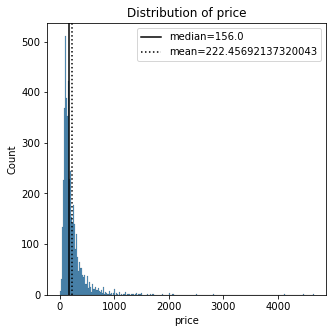

In [89]:
# Price is skewed and the outliers are impacting the normalacy
plot_distribution(df_train, 'price')

### Only remove outliers from training set


In [90]:
# Make a function to find outlier using IQR method
# I want to keep as much data as possible so I am making my q1 small and my q3 large
from scipy import stats
def find_outliers_IQR(df_train):
    q1 = df_train.quantile(0.25)
    q3 = df_train.quantile(0.75)
    thresh = 1.5*(q3-q1)
    idx_outliers =(df_train < (q1-thresh)) | (df_train > (q3+thresh))
    return idx_outliers

In [91]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course

def diagnostic_plots(df_train, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    median = df_train[variable].median()
    mean = df_train[variable].mean()
    sns.histplot(df_train[variable], bins=30)
    #plt.title('Histogram')
    
    plt.title(F"Distribution of {variable}")
    plt.axvline(median,label=f'median={median:,}',color='black')
    plt.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    plt.legend()

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df_train[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()

In [92]:
price_outliers_IQR = find_outliers_IQR(df_train['price'])
price_outliers_IQR.sum()

346

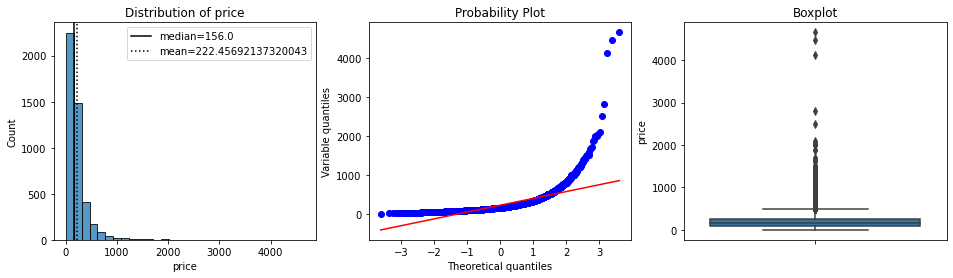

In [93]:
# Look at plots before removing outliers
diagnostic_plots(df_train, 'price')

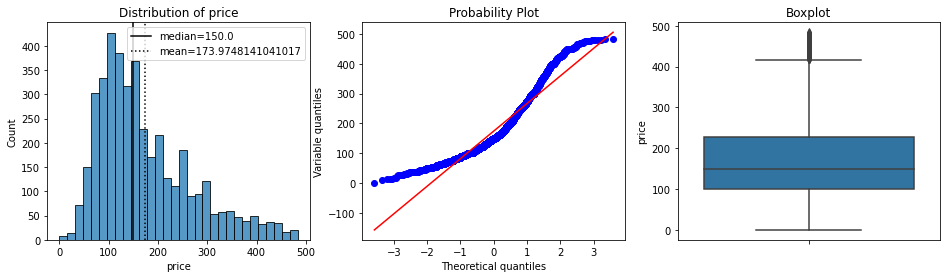

In [94]:
# See how removing these outliers would change the distribution
df_train = df_train[~price_outliers_IQR].copy()

# Remove outliers for visualization df 
diagnostic_plots(df_train, 'price')

All three plots indicate that removing the outliers have helped with normality 

In [95]:
# See about removing bedroom outliers
bedrooms_outliers_IQR = find_outliers_IQR(df_train['bedrooms'])
bedrooms_outliers_IQR.sum()

274

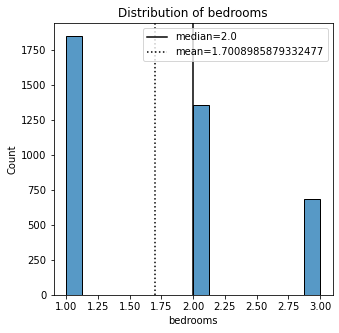

In [96]:
# find top outliers
find_bedrooms = df_train[~bedrooms_outliers_IQR]
plot_distribution(find_bedrooms, 'bedrooms')

In [97]:
# I want to remove as little outliers as possible, so instead of dropping all rows with 4+ beds I am
# going to make a 4 or more column instead
df_train.loc[(df_train['bedrooms'] >= 4), 'bedrooms'] = '4+'
#df_train.loc[df_train['beds'].contains("7|8|9|10|12|13"),'beds'] = '7+'
df_test.loc[(df_test['bedrooms'] >= 4), 'bedrooms'] = '4+'
df_train['bedrooms'].value_counts()

1.0    1850
2.0    1360
3.0     685
4+      274
Name: bedrooms, dtype: int64

In [98]:
# See about removing bedroom outliers
beds_outliers_IQR = find_outliers_IQR(df_train['beds'])
beds_outliers_IQR.sum()

117

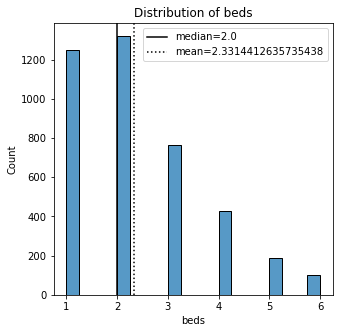

In [99]:
# Remove top outliers
find_beds = df_train[~beds_outliers_IQR]
plot_distribution(find_beds, 'beds')

In [100]:
# I want to remove as little outliers as possible, so instead of dropping all rows with 6+ beds I am
# going to make a 7 or more column instead
df_train.loc[(df_train['beds'] >= 7), 'beds'] = '7+'
# Need to do this on the test set or there will be NaN values when doing encoding
df_test.loc[(df_test['beds'] >= 7), 'beds'] = '7+'
#df_train.loc[df_train['beds'].contains("7|8|9|10|12|13"),'beds'] = '7+'
df_train['beds'].value_counts()

2.0    1321
1.0    1249
3.0     764
4.0     429
5.0     186
7+      117
6.0     103
Name: beds, dtype: int64

In [101]:
review_cols = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

def diagnostic_reviews(df_train, review_cols):
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=True)

    for col, ax in zip(review_cols, axes.flatten()):
        ax.hist(df_train[col], bins='auto')
        ax.set_title(col)
    
        median = df_train[col].median()
        mean = df_train[col].mean()
    
        ax.set_title(F"Distribution of {col}")
        ax.axvline(median,label=f'median={median:,}',color='black')
        ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
        ax.legend()
 
    fig.tight_layout()

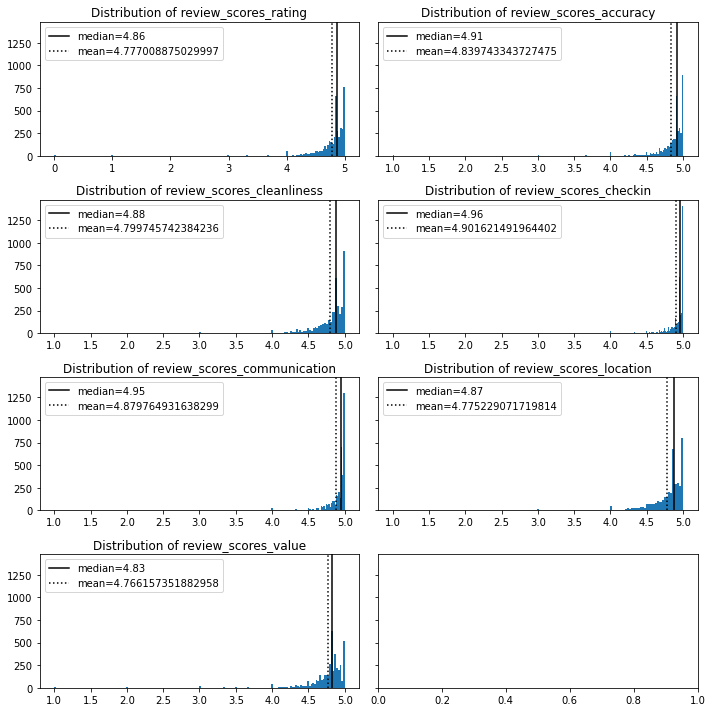

In [102]:
diagnostic_reviews(df_train, review_cols)

In [103]:
# See about removing bedroom outliers
review_scores_rating_outliers_IQR = find_outliers_IQR(df_train['review_scores_rating'])
review_scores_rating_outliers_IQR.sum()

268

In [104]:
review_scores_location_outliers_IQR = find_outliers_IQR(df_train['review_scores_location'])
review_scores_location_outliers_IQR.sum()

284

In [105]:
review_scores_communication_outliers_IQR = find_outliers_IQR(df_train['review_scores_communication'])
review_scores_communication_outliers_IQR.sum()

324

In [106]:
review_scores_checkin_outliers_IQR = find_outliers_IQR(df_train['review_scores_checkin'])
review_scores_checkin_outliers_IQR.sum()

432

In [107]:
review_scores_cleanliness_outliers_IQR = find_outliers_IQR(df_train['review_scores_cleanliness'])
review_scores_cleanliness_outliers_IQR.sum()

298

In [108]:
review_scores_accuracy_outliers_IQR = find_outliers_IQR(df_train['review_scores_accuracy'])
review_scores_accuracy_outliers_IQR.sum()

323

In [109]:
review_scores_value_outliers_IQR = find_outliers_IQR(df_train['review_scores_value'])
review_scores_value_outliers_IQR.sum()

268

In [110]:
min_night_outliers_IQR = find_outliers_IQR(df_train['minimum_nights'])
min_night_outliers_IQR.sum()

902

In [111]:
# Not going to elimnate the 1 night min stays
df_train['minimum_nights'].describe()

count    4169.000000
mean        8.699208
std        17.239247
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       365.000000
Name: minimum_nights, dtype: float64

In [112]:
# let's trimm the dataset
rating_outliers = (review_scores_rating_outliers_IQR | review_scores_value_outliers_IQR | 
                              review_scores_checkin_outliers_IQR | review_scores_communication_outliers_IQR |
                              review_scores_location_outliers_IQR | review_scores_accuracy_outliers_IQR |
                              review_scores_cleanliness_outliers_IQR)


In [113]:
# make df_clean 
df_train = df_train[~rating_outliers].copy()

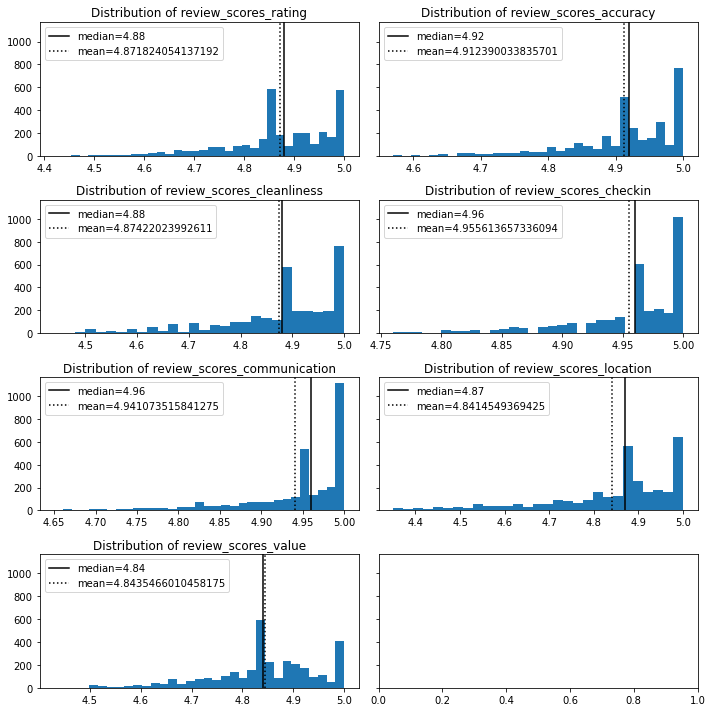

In [114]:
diagnostic_reviews(df_train, review_cols)

In [115]:
df_train.shape

(3251, 24)

In [116]:
df_train['price'].describe()

count    3251.000000
mean      171.014149
std        96.193995
min         0.000000
25%       100.000000
50%       145.000000
75%       220.500000
max       482.000000
Name: price, dtype: float64

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 2025 to 860
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            3251 non-null   object 
 1   neighbourhood                3251 non-null   object 
 2   property_type                3251 non-null   object 
 3   room_type                    3251 non-null   object 
 4   accommodates                 3251 non-null   int64  
 5   bathrooms                    3251 non-null   object 
 6   bedrooms                     3251 non-null   object 
 7   beds                         3251 non-null   object 
 8   price                        3251 non-null   float64
 9   minimum_nights               3251 non-null   int64  
 10  maximum_nights               3251 non-null   int64  
 11  availability_30              3251 non-null   int64  
 12  availability_60              3251 non-null   int64  
 13  availability_90 

In [118]:
df_train.loc[df_train['price'] == 0]

,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4228,t,Marigny,Room in boutique hotel,Hotel room,4,1 bath,1.0,1.0,0.0,1,...,0,15,5.0,5.0,4.87,4.87,5.0,4.87,4.93,f


In [119]:
# row with no price
df_train.drop(4228, axis=0, inplace=True)

In [120]:
df_test.loc[df_test['price'] == 0]

,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4280,f,Mid-City,Room in hotel,Hotel room,8,1 bath,1.0,1.0,0.0,1,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f


In [121]:
df_test.drop(4280, axis=0, inplace=True)

df_train started with 4515 rows and ended with 3251 rows

In [122]:
# remove the target variable from df_train_encoded
target = 'price'

y_train = df_train[target].copy()
X_train = df_train.drop(target, axis=1).copy()
y_test = df_test[target].copy()
X_test = df_test.drop(target, axis=1).copy()

In [123]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1505 entries, 5113 to 4410
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1505 non-null   float64
dtypes: float64(1)
memory usage: 23.5 KB


In [124]:
y_train.describe()

count    3250.000000
mean      171.066769
std        96.161991
min        11.000000
25%       100.000000
50%       145.000000
75%       220.750000
max       482.000000
Name: price, dtype: float64

In [125]:
# ordinal encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['host_is_superhost', 'bathrooms', 'beds', 'bedrooms'])

ordinal_enc.fit(X_train)
#ordinal_enc.fit(df_test_encoded)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['host_is_superhost', 'bathrooms', 'beds', 'bedrooms'])

In [126]:
ordinal_enc.encoder_dict_

{'host_is_superhost': {'t': 0, 'f': 1},
 'bathrooms': {'1 bath': 0,
  '2 baths': 1,
  '3 baths': 2,
  '4 baths': 3,
  '5 or more baths': 4},
 'beds': {1.0: 0, 3.0: 1, 2.0: 2, 6.0: 3, 5.0: 4, '7+': 5, 4.0: 6},
 'bedrooms': {1.0: 0, 2.0: 1, '4+': 2, 3.0: 3}}

In [127]:
X_train_ord = ordinal_enc.transform(X_train)
X_test_ord = ordinal_enc.transform(X_test)

In [128]:
X_train_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 2025 to 860
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            3250 non-null   int64  
 1   neighbourhood                3250 non-null   object 
 2   property_type                3250 non-null   object 
 3   room_type                    3250 non-null   object 
 4   accommodates                 3250 non-null   int64  
 5   bathrooms                    3250 non-null   int64  
 6   bedrooms                     3250 non-null   int64  
 7   beds                         3250 non-null   int64  
 8   minimum_nights               3250 non-null   int64  
 9   maximum_nights               3250 non-null   int64  
 10  availability_30              3250 non-null   int64  
 11  availability_60              3250 non-null   int64  
 12  availability_90              3250 non-null   int64  
 13  availability_365

In [129]:
ohe_enc = fe_OneHotEncoder(variables=['neighbourhood', 'property_type',
                                      'room_type', 'instant_bookable'], drop_last=True)

ohe_enc.fit(X_train_ord)

OneHotEncoder(drop_last=True,
              variables=['neighbourhood', 'property_type', 'room_type',
                         'instant_bookable'])

In [130]:
X_train_encoded = ohe_enc.transform(X_train_ord)

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encodin

In [131]:
X_test_encoded = ohe_enc.transform(X_test_ord)

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/feature_engine/encodin

In [132]:
# Make sure train set looks right
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 2025 to 860
Columns: 128 entries, host_is_superhost to instant_bookable_t
dtypes: float64(7), int64(121)
memory usage: 3.2 MB


In [133]:
# Make sure test set looks right
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 5113 to 4410
Columns: 128 entries, host_is_superhost to instant_bookable_t
dtypes: float64(7), int64(121)
memory usage: 1.5 MB


In [134]:
X_train.columns

Index(['host_is_superhost', 'neighbourhood', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [135]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set
scaler.fit(X_train_encoded)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [136]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)
np.round(X_train_encoded.describe(), 1)

,host_is_superhost,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,property_type_Private room in bungalow,property_type_Barn,property_type_Private room in farm stay,property_type_Entire home/apt,property_type_Shared room in condominium (condo),property_type_Private room in tiny house,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_t
count,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,...,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0
mean,0.5,4.4,0.4,0.9,1.8,8.8,619.2,11.0,26.6,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.1,0.0,0.5
std,0.5,2.4,0.6,1.1,1.8,17.2,505.2,9.4,19.7,29.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.1,0.5
min,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,0.0,0.0,0.0,2.0,45.0,0.0,5.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.0,4.0,0.0,1.0,2.0,2.0,365.0,10.0,28.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
75%,1.0,6.0,1.0,1.0,2.0,3.0,1125.0,18.0,43.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
max,1.0,16.0,4.0,3.0,6.0,365.0,1125.0,30.0,60.0,90.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [137]:
# see which predictors have high correlation which each other
correlation = X_train_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)

correlation['pairs'] = list(zip(correlation.level_0, correlation.level_1))

correlation.set_index(['pairs'], inplace = True)

correlation.drop(columns=['level_1', 'level_0'], inplace = True)

correlation.columns = ['corr_coef']

correlation[(correlation.corr_coef>.75) & (correlation.corr_coef<1)]

,corr_coef
pairs,
"(availability_60, availability_90)",0.947823
"(availability_90, availability_60)",0.947823
"(room_type_Private room, room_type_Entire home/apt)",0.931761
"(room_type_Entire home/apt, room_type_Private room)",0.931761
"(availability_60, availability_30)",0.920696
"(availability_30, availability_60)",0.920696
"(availability_90, availability_30)",0.836337
"(availability_30, availability_90)",0.836337
"(room_type_Shared room, property_type_Shared room in residential home)",0.796737


When two columns have a high correlation it will hurt the models performance. To help solve the issue of multicollinearity we will elimnate one column from each highly corrilate pair. In this case I will remove `availability_90`, `property_type_Shared room in residential home`, `availability_60` and `review_scores_accuracy`

In [138]:
# Remove one column from each highly correlated pair
X_train_encoded.drop(['availability_90','property_type_Shared room in residential home',
              'review_scores_accuracy', 'availability_60', 'accommodates'], axis=1, inplace=True)

In [139]:
X_test_encoded.drop(['availability_90','property_type_Shared room in residential home',
              'review_scores_accuracy', 'availability_60', 'accommodates'], axis=1, inplace=True)

In [140]:
#y_train = y_train.to_frame()

In [141]:
#y_test = y_test.to_frame()

Last step is to scale the data, once that is done we will make the same changes to the test set that we did on the training set.

## End of preprocessing notebook, next notebook is modeling

In [142]:
X_train_encoded.to_csv('Data_orleans/X_train_encoded.csv')
X_test_encoded.to_csv('Data_orleans/X_test_encoded.csv')
y_train.to_csv('Data_orleans/y_train.csv')
y_test.to_csv('Data_orleans/y_test.csv')

In [143]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 2025 to 860
Columns: 123 entries, host_is_superhost to instant_bookable_t
dtypes: float64(6), int64(117)
memory usage: 3.1 MB


# model

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [145]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [146]:
# I can try log transformation and see if that helps
# Create a figure and axis to plot on
#import scipy as sp
#fig, ax = plt.subplots(figsize=(4,4),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
#_ = sp.stats.probplot(test_res,plot=ax)

In [147]:
import statsmodels.api as sm

In [148]:
# function to create displot, Q-Q plot and boxplot
from sklearn.metrics import r2_score

def model_diagnostic(model, X_test_encoded, y_test):

    test_pred = model.predict(X_test_encoded)
    train_pred = model.predict(X_train_encoded)
    test_res = y_test - test_pred
    r2 = r2_score(y_test,test_pred)
    
    print(f'Test Mean Absolute Error : {mean_absolute_error(y_test,test_pred)}')
    print(f'Test Mean Squared Error: {mean_squared_error(y_test,test_pred)}')
    print(f'Test Root Mean Square Error : {np.sqrt(mean_squared_error(y_test,test_pred))}')
    print(f'Test R2 : {r2_score(y_test,test_pred)}')
    print(f'Train R2 : {r2_score(y_train,train_pred)}')
    
    # define figure size
    #plt.figure(figsize=(16, 4))
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(18, 6))
    #ax=axs[0]

    # Q-Q plot
    #plt.subplot(1, 3)
    #stats.probplot(test_res, plot=plt, ax=axs[0])

    # res
    #sns.scatterplot(x=y_test,y=test_res, ax=axs[1])
    #plt.axhline(y=0, color='r', linestyle='--')
    #plt.title('Residuals')

    #plt.show()

Next we will make a funtion to evaluate our model's performance. A breif overview of the different metrics:
- Mean Absolute Error (MAE): A basic metric that gives us the absolute difference between actual and predicted values. Idealy the final model would have a smaller MAE than the baseline model since we aim to lower the amount of error by tuning models.
- Mean Squared Error (MSE): Finds the squared difference between the actual and predicted values. The MSE is helpful since it avoids the cancellation of negative terms (unlike MAE). However, outliers will be more damaging since it penalizes the outliers more than MAE. 
- Root Mean Square Error(RMSE): Is the square root of the MSE. RMSE is easier to interpret than MSE since the output is in the same units as the variable
- R Squared (R2): A metric that tells the performance of the model, unlike the others which show the loss. This is a metric that is best for comparing the different models. R2 will be a value betweet 0 and 1, with 1 being a perfect fit.

In [149]:
model_diagnostic(model, X_test_encoded, y_test)

Test Mean Absolute Error : 92.98486645487664
Test Mean Squared Error: 43748.06979267106
Test Root Mean Square Error : 209.16039250458263
Test R2 : 0.25010651097183956
Train R2 : 0.566171353245386


We see the baseline model has a R2 score of 0.25 which indicates it is a very poor performing model. 

## Model 2
In regression there are many different model types to choose from. Next, I am going to try a Random Forrest Model which is a little more robust to outliers than a Linear Regression model is. 

In [150]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 2025 to 860
Columns: 123 entries, host_is_superhost to instant_bookable_t
dtypes: float64(6), int64(117)
memory usage: 3.1 MB


In [151]:
# Import Random Forest
# We see the baseline randomforest did even worse, so we do some hyperameter tuning to see if we can improve the model
from sklearn.ensemble import RandomForestClassifier

# first make a baseline random forest model to do a gridsearch on
forest_baseline = RandomForestClassifier()
forest_baseline.fit(X_train_encoded, y_train)

#model_diagnostic(forest_baseline, X_test_encoded, y_test)

RandomForestClassifier()

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
# Use gridsearch to find a better RandomForest model
# I will start with a spread of different parameter options

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 75],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
}


gridsearch_rf1 = GridSearchCV(estimator=forest_baseline,
                          param_grid=param, cv= 3, scoring='r2')

# Run search & takes a min or two
gridsearch_rf1.fit(X_train_encoded, y_train)
gridsearch_rf1.best_params_

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'criterion': 'gini',
 'max_depth': 75,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [154]:
results = pd.DataFrame(gridsearch_rf1.cv_results_)
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
print(results.shape)

results.head(2)

(108, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.345500,0.011714,0.114032,0.002195,gini,75,auto,10,2,"{'criterion': 'gini', 'max_depth': 75, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2}",0.285752,0.240455,0.278425,0.268211,0.019853,1
1,0.350105,0.011642,0.115701,0.001368,gini,50,sqrt,10,10,"{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10}",0.281261,0.232656,0.277716,0.263877,0.022125,2


Text(0.5, 0, 'Hyperparameter combinations')

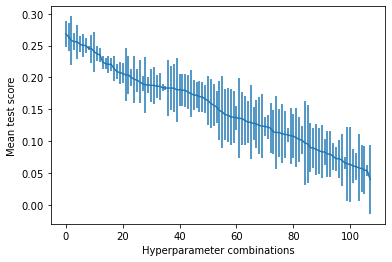

In [155]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [156]:
model_diagnostic(model, X_test_encoded, y_test)

Test Mean Absolute Error : 92.98486645487664
Test Mean Squared Error: 43748.06979267106
Test Root Mean Square Error : 209.16039250458263
Test R2 : 0.25010651097183956
Train R2 : 0.566171353245386


In [157]:
y_train = y_train.to_frame()

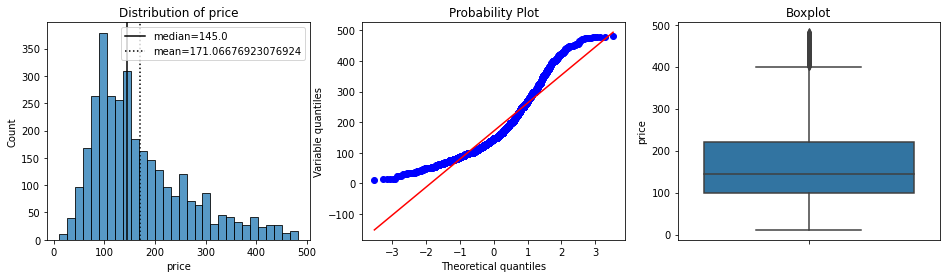

In [158]:
# that does look a lot more normal
diagnostic_plots(y_train, 'price')

In [159]:
y_train['price'] = np.log(y_train['price'])

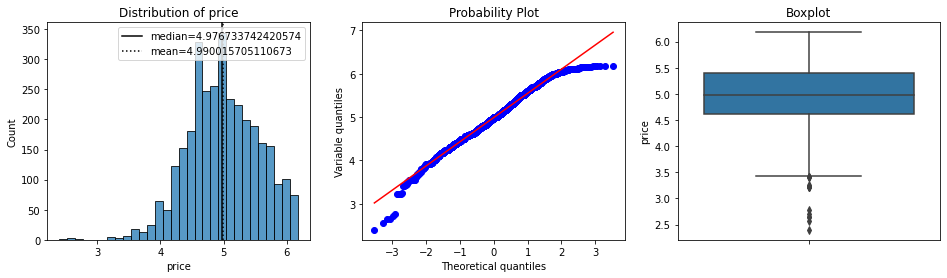

In [160]:
# that does look a lot more normal
diagnostic_plots(y_train, 'price')

In [161]:
#y_train['bc_price'], param = stats.boxcox(y_train['price']) 

#print('Optimal λ: ', param)

#diagnostic_plots(y_train, 'bc_price')

We see that all variations of the random forest model do poorly. We know that the data is skewed so we can try to prep the training data some more and see if that helps. We can try to do a log transformation.

In [162]:
# to find lambda for boxcox
#box_price = stats.boxcox(y_train['price'])

In [163]:
# see which method helped the most with skewness 
print(f'''The skewness of the price is \
 {y_train["price"].skew():.2f}''')
#print(f'''The skewness of the log price is \
 #{y_train["log_price"].skew():.2f}''')
#print(f'''The skewness of the boxcox transform of price is\
 #{y_train["bc_price"].skew():.2f}''') 
#print(f'''using a lambda of\
 #{box_price[1]:.3f}''')

The skewness of the price is  -0.17


In [164]:
# transform test set to same boxcox lambda as training set
y_test_log = np.log(y_test)

In [165]:
y_train_log = np.log(y_train)

In [166]:
# Make df for columns that belong in a regression model
#drop = ['price', 'log_price']
#y_train_bc = y_train.drop(drop, axis = 1)

In [167]:
# function to create displot, Q-Q plot and boxplot
#from sklearn.metrics import r2_score

def model_diagnostic2(model, X_test_encoded, y_test_log):

    test_pred = model.predict(X_test_encoded)
    train_pred = model.predict(X_train_encoded)
    #test_res = y_test_log - test_pred
    r2 = r2_score(y_test_log,test_pred)
    
    print(f'Test Mean Absolute Error : {mean_absolute_error(y_test_log,test_pred)}')
    print(f'Test Mean Squared Error: {mean_squared_error(y_test_log,test_pred)}')
    print(f'Test Root Mean Square Error : {np.sqrt(mean_squared_error(y_test_log,test_pred))}')
    print(f'Test R2 : {r2_score(y_test_log,test_pred)}')
    print(f'Train R2 : {r2_score(y_train_log,train_pred)}')
    
    # define figure size
    #plt.figure(figsize=(16, 4))
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(18, 6))
    #ax=axs[0]

    # Q-Q plot
    #plt.subplot(1, 3)
    #stats.probplot(test_res, plot=plt, ax=axs[0])

    # res
    #sns.scatterplot(x=y_test,y=test_res, ax=axs[1])
    #plt.axhline(y=0, color='r', linestyle='--')
    #plt.title('Residuals')

    #plt.show()

In [168]:
# lets see if that helped our model at all
model = LinearRegression()
model.fit(X_train_encoded, y_train_log)
#model_diagnostic(model, X_test_encoded, y_test_log)

LinearRegression()

In [169]:
model_diagnostic2(model, X_test_encoded, y_test_log)

Test Mean Absolute Error : 3.557460323389255
Test Mean Squared Error: 13.074991855335508
Test Root Mean Square Error : 3.6159358201350185
Test R2 : -24.177226099436133
Train R2 : 0.6128751525514003


In [170]:
# we know other variables are skewed 
X_train.columns

Index(['host_is_superhost', 'neighbourhood', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [171]:
print(f'''The skewness of the cleanliness score is \
 {X_train_encoded["review_scores_cleanliness"].skew():.2f}''')

print(f'''The skewness of the overall rating is \
 {X_train_encoded["review_scores_rating"].skew():.2f}''')

print(f'''The skewness of the value score is \
 {X_train_encoded["review_scores_value"].skew():.2f}''')

print(f'''The skewness of the communication score is \
 {X_train_encoded["review_scores_communication"].skew():.2f}''')

print(f'''The skewness of the location score is \
 {X_train_encoded["review_scores_location"].skew():.2f}''')

print(f'''The skewness of the checkin score is \
 {X_train_encoded["review_scores_checkin"].skew():.2f}''')

print(f'''The skewness of the log the number of reviews is \
 {X_train_encoded["number_of_reviews"].skew():.2f}''')

The skewness of the cleanliness score is  -1.17
The skewness of the overall rating is  -1.02
The skewness of the value score is  -0.68
The skewness of the communication score is  -1.68
The skewness of the location score is  -1.20
The skewness of the checkin score is  -1.51
The skewness of the log the number of reviews is  2.43


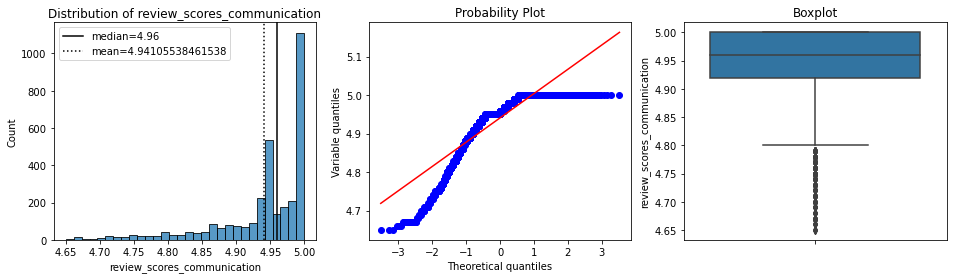

In [172]:
# that does look a lot more normal
diagnostic_plots(X_train_encoded, 'review_scores_communication')

In [173]:
# the number of reviews is very skewed lets transform that 
X_train_encoded['review_scores_communication_log'] = np.log(X_train_scaled['review_scores_communication'])

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


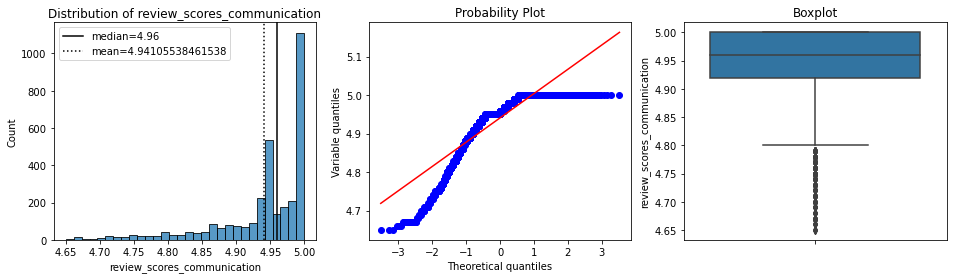

In [174]:
# that does look a lot more normal
diagnostic_plots(X_train_encoded, 'review_scores_communication')

In [175]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
model_diagnostic2(model2, X_test_encoded, y_test)

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- accommodates
- availability_60
- availability_90
- property_type_Shared room in residential home
- review_scores_accuracy

  warnings.warn(message, FutureWarning)


ValueError: X has 123 features, but LinearRegression is expecting 128 features as input.

In [177]:
X_test_encoded['beds']

5113    2
3505    3
2827    2
3691    0
5887    0
       ..
2611    0
898     2
428     2
5590    1
4410    2
Name: beds, Length: 1505, dtype: int64

In [180]:
test_pred = model.predict(X_test_encoded)
train_pred = model.predict(X_train_encoded)
test_res = y_test - test_pred
r2 = r2_score(y_test,test_pred)
sns.scatterplot(x=y_test,y=test_res, data=model)
plt.axhline(y=0, color='r', linestyle='--')

/Users/rachelfein/opt/anaconda3/envs/predictive-env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- review_scores_communication_log
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').